In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [68]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label, color):
    w = clf.coef_[0]
    xx = np.linspace(min_x - 0.5, max_x + 0.5)
    yy = (w[0] * xx + clf.intercept_[0])/w[1]
    plt.plot(xx, yy, linestyle, color=color, label=label)

def plot_subplot(X, Y, subplot_n, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError
        
    # fit model
    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)
    
    plt.subplot(2, 2, subplot_n)
    plt.title(title)
    
    # scatter plot all data points
    plt.scatter(X[:, 0], X[:, 1], c='gray')
    # scatter plot points that belongs to class one
    class_one = np.where(Y[:, 0])
    plt.scatter(X[class_one, 0], X[class_one, 1], s=160, facecolor='none', edgecolors='b', label='Class 1')
    # scatter plot points that belongs to class two
    class_two = np.where(Y[:, 1])
    plt.scatter(X[class_two, 0], X[class_two, 1], s=160, facecolor='none', edgecolors='r', label='Class 2')
    
    # draw hyperplane for each class
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    # hyperplane for class one
    plot_hyperplane(classif.estimators_[0], min_x, max_x, color='b', 
                    linestyle='-', label='boundary for class 1')
    # hyperplane for class two
    plot_hyperplane(classif.estimators_[1], min_x, max_x, color='r', 
                    linestyle='-.', label='boundary for class 2')
    plt.xticks(())
    plt.yticks(())
    
    if subplot_n == 1:
        plt.legend(loc='upper left')

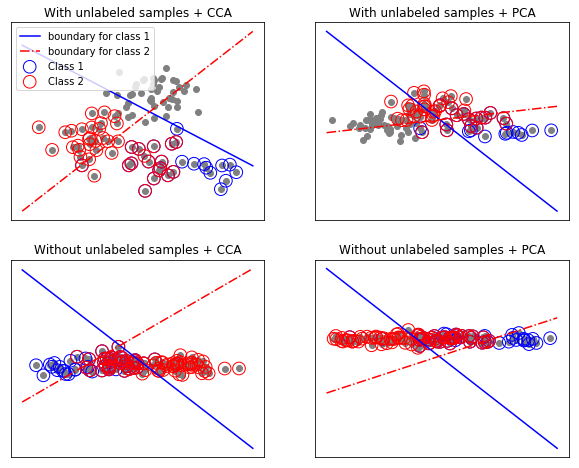

In [69]:
# create some data
# allow unlabeled data
X_unlabeled, Y_unlabeled = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)
# not allow unlabeled data
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plt.figure(figsize=(10, 8))
plot_subplot(X_unlabeled, Y_unlabeled, 1, "With unlabeled samples + CCA", "cca")
plot_subplot(X_unlabeled, Y_unlabeled, 2, "With unlabeled samples + PCA", "pca")
plot_subplot(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subplot(X, Y, 4, "Without unlabeled samples + PCA", "pca")